# <center> NETFLIX MOVIES AND SERIES ANALYSIS</center>

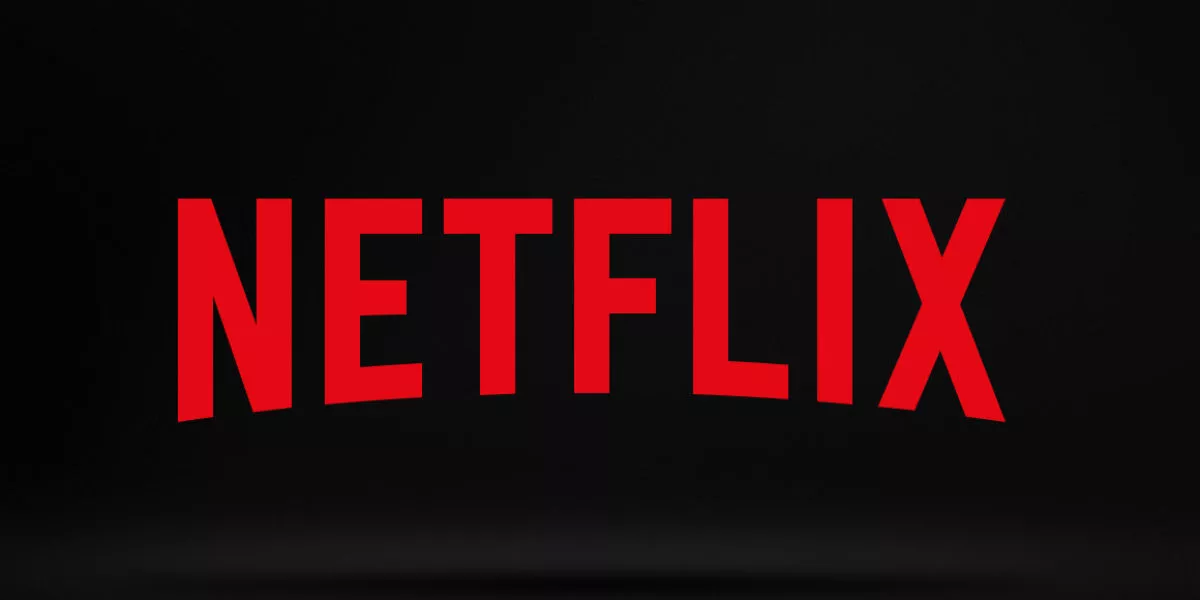

## ABOUT

This dataset contains information about content available on Netflix in India in the middle of 2021. It has 12 columns:
- show_id
- type - movie or TV show
- title
- director - mainly in movies, rarely mentioned in series
- cast - list of actors 
- country - in which show was produced
- date_added - date when the show was added to Neflix
- released_year - year when show was released
- rating - content rating that specify the age of the viewer
- duration - duration time of movies or number of seasons in series
- listed_in - genres
- description

Source of the dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data preparation and cleaning

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df.shape
# (rows, columns)

(8807, 12)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# dropping unnecessary column
netflix_df = netflix_df.drop('show_id', axis=1, errors='ignore')

In [8]:
# changing type of 'date_added' column to datetime in order to divide it into day, month, year and weekday
netflix_df['date_added'] = pd.to_datetime(netflix_df.date_added)

netflix_df['day'] = pd.DatetimeIndex(netflix_df.date_added).day
netflix_df['month'] = pd.DatetimeIndex(netflix_df.date_added).month
netflix_df['year'] = pd.DatetimeIndex(netflix_df.date_added).year
netflix_df['weekday'] = pd.DatetimeIndex(netflix_df.date_added).weekday + 1 # default value of monday is 0, tuesday - 1 etc.

In [9]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,6.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,5.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,5.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,5.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,5.0


In [10]:
# check if there are null or missing values in the dataset
netflix_df.isnull().values.any()

True

In [11]:
# check which columns contain null or missing values
netflix_df.columns[netflix_df.isnull().any()]

Index(['director', 'cast', 'country', 'date_added', 'rating', 'duration',
       'day', 'month', 'year', 'weekday'],
      dtype='object')

In [12]:
netflix_df['weekday'].isna().sum()

10

In [13]:
netflix_df['day'].isna().sum()

10

In [14]:
netflix_df['month'].isna().sum()

10

In [15]:
netflix_df['year'].isna().sum()

10

In [16]:
# there are very low number of nulls in date columns so I simply drop them
netflix_df.dropna(axis=0, how="any", thresh=None, subset=['day', 'weekday', 'month', 'year'], inplace=True)

In [17]:
# changing type of the numeric columns from float to int
netflix_df[['day', 'weekday', 'month', 'year']] = netflix_df[['day', 'weekday', 'month', 'year']].astype(int)

In [18]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [19]:
# some values in 'rating' column doesn`t fit to it, so I replce them with NaN
netflix_df.where(~(netflix_df.rating.str.contains('min', na=False)), np.nan, inplace=True)

In [20]:
netflix_df.describe()

,release_year,day,month,year,weekday
count,8794.000000,8794.000000,8794.000000,8794.000000,8794.000000
mean,2014.183534,12.497612,6.654878,2018.872754,4.017285
std,8.823527,9.888716,3.436903,1.573789,1.727461
min,1925.000000,1.000000,1.000000,2008.000000,1.000000
25%,2013.000000,1.000000,4.000000,2018.000000,3.000000
50%,2017.000000,13.000000,7.000000,2019.000000,4.000000
75%,2019.000000,20.000000,10.000000,2020.000000,5.000000
max,2021.000000,31.000000,12.000000,2021.000000,7.000000


In [21]:
# From the description I don't see any incorret values of numeric columns 
# (like, for example, day of month greater than 31 or month grater than 12)

In [22]:
netflix_df['type'].unique()

array(['Movie', 'TV Show', nan], dtype=object)

In [23]:
# making a copy of dataset that contains just series 
series_df = netflix_df.loc[netflix_df['type'] == 'TV Show'].copy()

In [24]:
# making a copy of dataset that contains just movies 
movies_df = netflix_df.loc[netflix_df['type'] == 'Movie'].copy()

In [25]:
series_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,weekday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,5.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,5.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,5.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,5.0
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,2021.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,1.0,5.0,2018.0,2.0
8796,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",17.0,1.0,2017.0,2.0
8797,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016.0,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,13.0,9.0,2018.0,4.0
8800,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,4.0


In [26]:
series_df.shape

(2666, 15)

In [27]:
series_df.columns[series_df.isna().any()]

Index(['director', 'cast', 'country', 'rating'], dtype='object')

In [28]:
series_df['director'].isna().sum()

2436

In [29]:
# 2446 of 2676 rows of 'director' in series_df are nulls, so this column is not very relevant
series_df = series_df.drop('director', axis=1)

In [30]:
series_df['country'].isna().sum()

390

In [31]:
series_df['cast'].isna().sum()

350

In [32]:
series_df['date_added'].isna().sum()

0

In [33]:
series_df.rename(columns={'duration': 'seasons_num'}, inplace=True)

In [34]:
# simplify values of seasons_num column by extracting digits; for example '1 season' will be just '1'
series_df['seasons_num'] = series_df['seasons_num'].str.extract('(\d+)', expand=False)

In [35]:
series_df['seasons_num'] = series_df['seasons_num'].astype(int)

In [36]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 8803
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          2666 non-null   object        
 1   title         2666 non-null   object        
 2   cast          2316 non-null   object        
 3   country       2276 non-null   object        
 4   date_added    2666 non-null   datetime64[ns]
 5   release_year  2666 non-null   float64       
 6   rating        2664 non-null   object        
 7   seasons_num   2666 non-null   int32         
 8   listed_in     2666 non-null   object        
 9   description   2666 non-null   object        
 10  day           2666 non-null   float64       
 11  month         2666 non-null   float64       
 12  year          2666 non-null   float64       
 13  weekday       2666 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(1), object(7)
memory usage: 302.0+ KB


In [37]:
# changing type of the numeric columns from float to int
series_df[['release_year', 'day', 'weekday', 'month', 'year']] = series_df[['release_year','day', 'weekday', 'month', 'year']].astype(int)

In [38]:
movies_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,6.0
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021.0,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,5.0
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24.0,9.0,2021.0,5.0
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24.0,9.0,2021.0,5.0
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23.0,9.0,2021.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015.0,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9.0,3.0,2016.0,3.0
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007.0,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20.0,11.0,2019.0,3.0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009.0,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1.0,11.0,2019.0,5.0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006.0,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11.0,1.0,2020.0,6.0


In [39]:
movies_df.shape

(6128, 15)

In [40]:
movies_df.columns[movies_df.isna().any()]

Index(['director', 'cast', 'country', 'rating'], dtype='object')

In [41]:
movies_df['director'].isna().sum()

188

In [42]:
movies_df['duration'].isna().sum()

0

In [43]:
movies_df.rename(columns={'duration': 'duration (min)'}, inplace=True)

In [44]:
# simplify values of 'duration (min)' column by extracting digits; for example '90 min' will be '90'
movies_df['duration (min)'] = movies_df['duration (min)'].str.extract('(\d+)', expand=False)

In [45]:
movies_df['duration (min)'] = movies_df['duration (min)'].astype(int)

In [46]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            6128 non-null   object        
 1   title           6128 non-null   object        
 2   director        5940 non-null   object        
 3   cast            5653 non-null   object        
 4   country         5688 non-null   object        
 5   date_added      6128 non-null   datetime64[ns]
 6   release_year    6128 non-null   float64       
 7   rating          6126 non-null   object        
 8   duration (min)  6128 non-null   int32         
 9   listed_in       6128 non-null   object        
 10  description     6128 non-null   object        
 11  day             6128 non-null   float64       
 12  month           6128 non-null   float64       
 13  year            6128 non-null   float64       
 14  weekday         6128 non-null   float64       
dtypes: d

In [47]:
# changing type of the numeric columns from float to int
movies_df[['release_year', 'day', 'weekday', 'month', 'year']] = movies_df[['release_year','day', 'weekday', 'month', 'year']].astype(int)

## Analysis

Exploratory data analysis to find interesting insights.

### Type

In [48]:
type_counts = netflix_df['type'].value_counts()
type_counts

Movie      6128
TV Show    2666
Name: type, dtype: int64

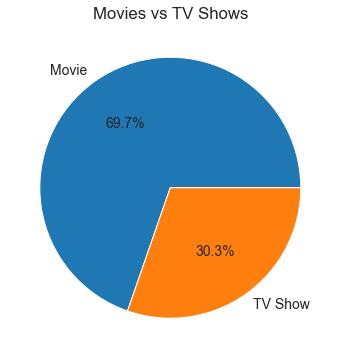

In [49]:
plt.figure(figsize=(12,6))
plt.title('Movies vs TV Shows')
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.show()

There are much more movies than TV shows in Netflix offer. It is not surprise for me - making series requires much more time than movies (even one-season productions last longer than single movie).

### Country

In [50]:
country_count = netflix_df['country'].value_counts()
country_count.head(10)

United States     2809
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

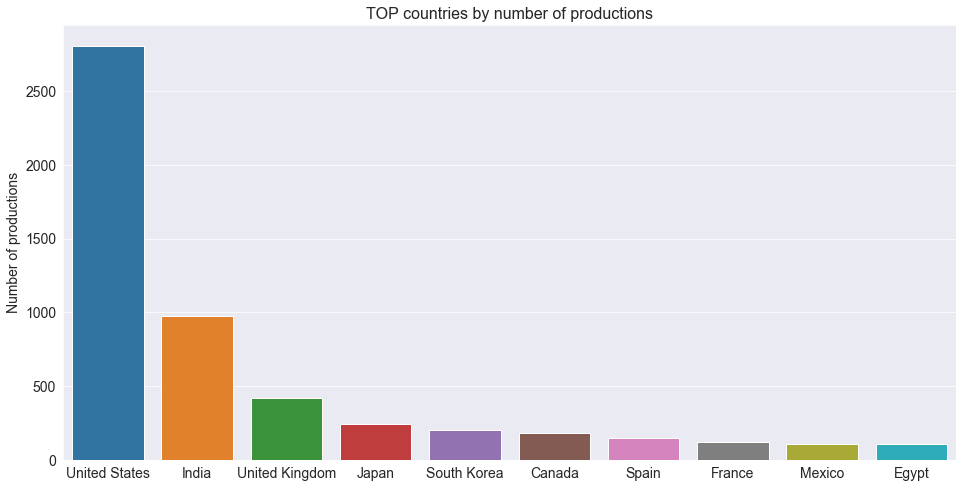

In [51]:
plt.figure(figsize=(16,8))
plt.title('TOP countries by number of productions', fontsize=16)
plt.ylabel('Number of productions')
sns.barplot(x = country_count.head(10).index, y = country_count.head(10).values)
plt.show()

In [52]:
movies_country_count = movies_df['country'].value_counts()
movies_country_count.head(10)

United States     2055
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: country, dtype: int64

In [53]:
series_country_count = series_df['country'].value_counts()
series_country_count.head(10)

United States     754
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          47
Name: country, dtype: int64

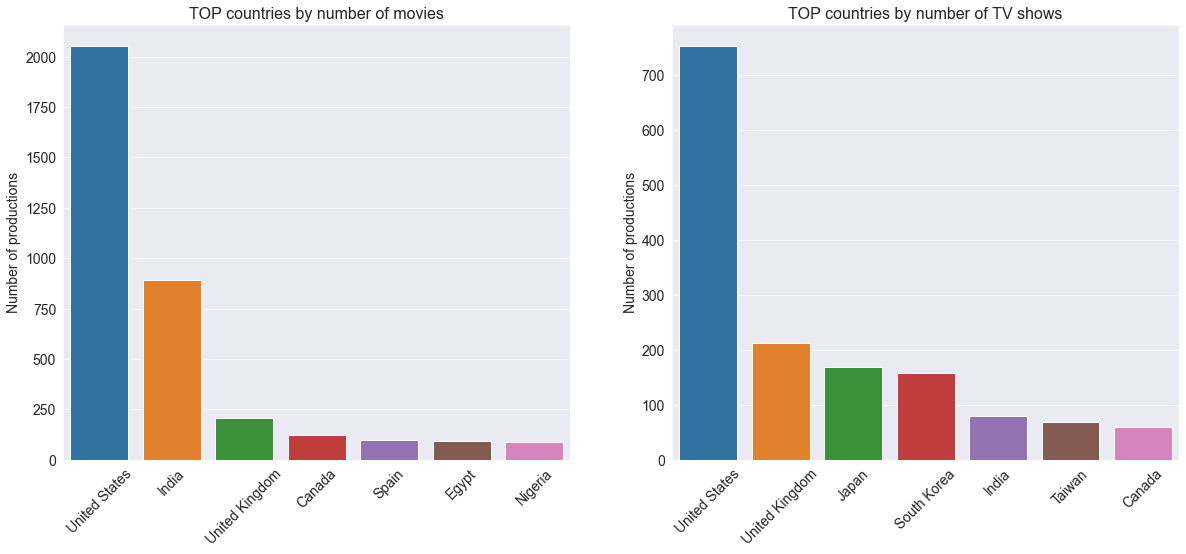

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0] = sns.barplot(x = movies_country_count.head(7).index, 
                      y = movies_country_count.head(7).values,
                      ax=axes[0])
axes[0].set_title('TOP countries by number of movies', fontsize=16)
axes[0].set_ylabel('Number of productions')
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)


axes[1] = sns.barplot(x = series_country_count.head(7).index, 
                      y = series_country_count.head(7).values, 
                      ax=axes[1])
axes[1].set_title('TOP countries by number of TV shows', fontsize=16)
axes[1].set_ylabel('Number of productions')
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

There are definetly the most movies and series from US. Their developed film industry provides that US productions have the largest share in Netflix offer probably in every country.
If it comes to India, it ranks 2nd in movies (after all, this is Netflix in India), but only ranks 5th in series. 
There are also a lot of series from Asia (Japan and South Korea).

### Content rating

NETFLIX RATINGS

LITTLE KIDS: <br>
G - for general audiences <br>
TV-Y - is appropriate for children of all ages <br>
TV-G - suitable for general audiences <br>

OLDER KIDS: <br>
PG - parental guidance suggested <br>
TV-Y7 - for children of ages 7 and older <br>
TV-Y7-FV - a program contains “fantasy violence” that may be more intense or combative than other TV-Y7 programs <br>
TV-PG - parental guidance is recommended <br>

TEENS: <br> 
PG-13 - may be inappropriate for children under 13 <br>
TV-14 - may be inappropriate for children under 14 <br>

MATURE: <br>
TV-MA - may not be suitable for ages 17 and under <br>
R - Restricted. May be inappropriate for ages 17 and under (given to movies) <br>
NC-17 - no one 17 or under admitted <br>
NR - not rated <br>
UR - unrated <br>

In [55]:
little_kids = (netflix_df.groupby(['rating'])['rating'].get_group('G').count() 
               + netflix_df.groupby(['rating'])['rating'].get_group('TV-Y').count()
               + netflix_df.groupby(['rating'])['rating'].get_group('TV-G').count())
little_kids

567

In [56]:
older_kids = (netflix_df.groupby(['rating'])['rating'].get_group('PG').count() 
              + netflix_df.groupby(['rating'])['rating'].get_group('TV-Y7').count() 
              + netflix_df.groupby(['rating'])['rating'].get_group('TV-Y7-FV').count()
              + netflix_df.groupby(['rating'])['rating'].get_group('TV-PG').count())
older_kids

1487

In [57]:
teens = (netflix_df.groupby(['rating'])['rating'].get_group('PG-13').count()
         + netflix_df.groupby(['rating'])['rating'].get_group('TV-14').count())
teens

2647

In [58]:
mature = (netflix_df.groupby(['rating'])['rating'].get_group('TV-MA').count() 
          + netflix_df.groupby(['rating'])['rating'].get_group('R').count() 
          + netflix_df.groupby(['rating'])['rating'].get_group('NC-17').count() 
          + netflix_df.groupby(['rating'])['rating'].get_group('NR').count() 
          + netflix_df.groupby(['rating'])['rating'].get_group('UR').count())
mature

4089

In [59]:
rating = [little_kids, older_kids, teens, mature]
names = ['little kids', 'older kids', 'teens', 'mature']

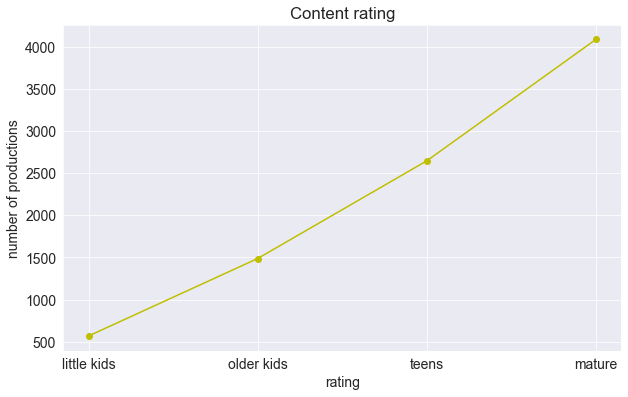

In [60]:
plt.figure(figsize=(10,6))
plt.plot(names, rating, 'o-y')
plt.title('Content rating')
plt.xlabel('rating')
plt.ylabel('number of productions')
plt.show()

As we can see from the plot, the correlation between age of the viewer and number of content is linear - the older viewer, the more content for them. Let's see how it looks when we take single ratings.

In [61]:
netflix_df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

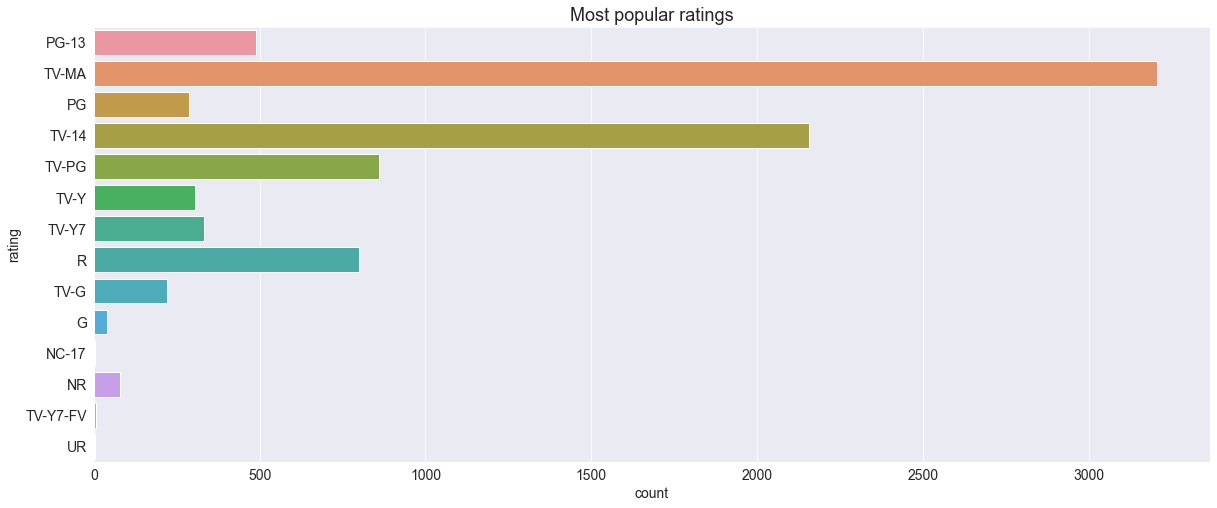

In [62]:
plt.figure(figsize=(20,8))
plt.ylabel(None)
plt.title('Most popular ratings', fontsize=18)
sns.countplot(y = netflix_df.rating)
plt.show()

In [63]:
movies_df.rating.value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

In [64]:
series_df.rating.value_counts()

TV-MA       1143
TV-14        730
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

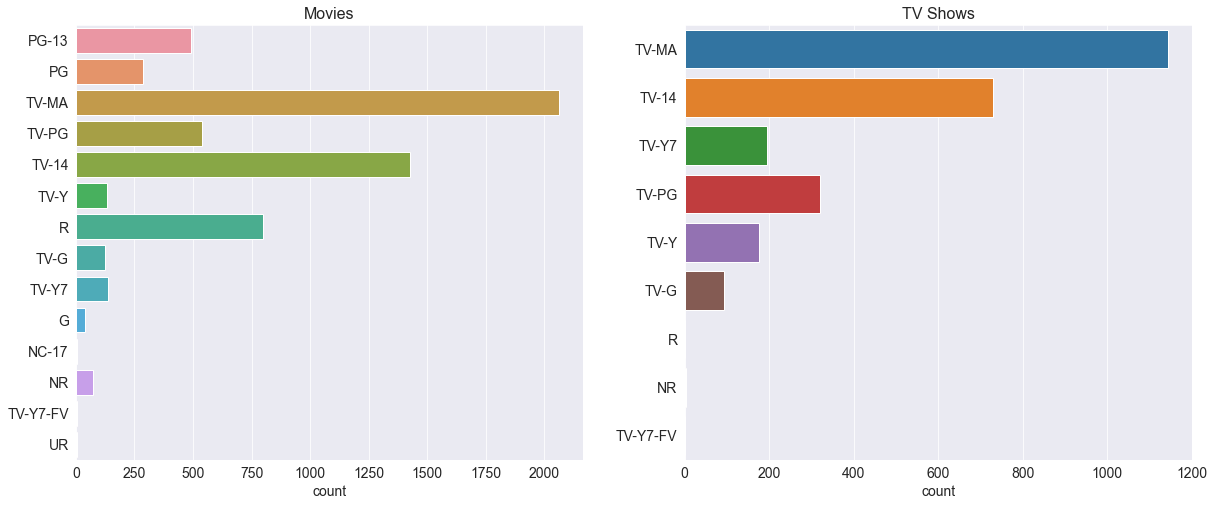

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0] = sns.countplot(y = movies_df.rating, 
                      ax=axes[0])
axes[0].set_title('Movies', fontsize=16)
axes[0].set_ylabel(None)


axes[1] = sns.countplot(y = series_df.rating,
                      ax=axes[1])
axes[1].set_title('TV Shows', fontsize=16)
axes[1].set_ylabel(None)
plt.show()

2 ratings clearly stand out at both types: TV-MA (the most popular) and TV-14. 

### On which days content is added?

In [66]:
add_times_by_weekdays = netflix_df.groupby(['weekday'])['weekday'].count()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

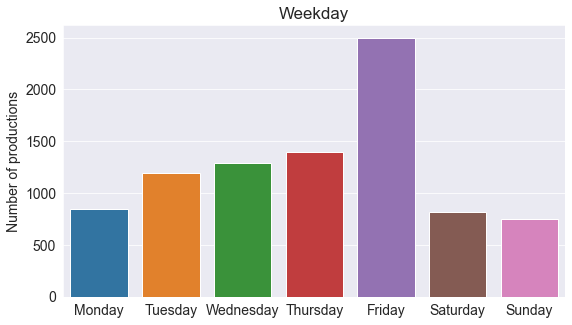

In [67]:
ax = sns.barplot(y = add_times_by_weekdays, x = days_of_week)
ax.set_title('Weekday')
ax.set_ylabel('Number of productions')
plt.show()

In [68]:
movies_add_times = movies_df.groupby(['weekday'])['weekday'].count()
series_add_times = series_df.groupby(['weekday'])['weekday'].count()

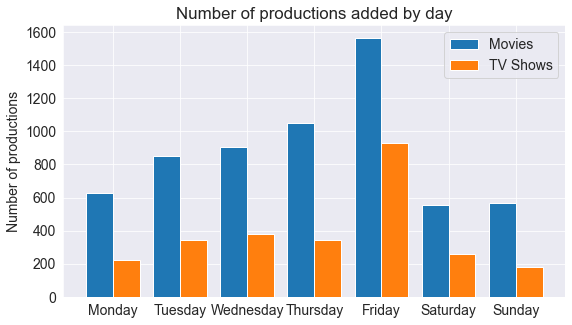

In [69]:
X_axis = np.arange(len(days_of_week))
plt.bar(X_axis - 0.2, movies_add_times, 0.4, label = 'Movies')
plt.bar(X_axis + 0.2, series_add_times, 0.4, label = 'TV Shows')
plt.xticks(X_axis, days_of_week)
plt.ylabel("Number of productions")
plt.title('Number of productions added by day')
plt.legend()
plt.show()

Most content is added on Fridays. My first thought was that  people usually don't go to work at the weekend and have more free time. New movies and series will encourage them to spend it watching Netlflix. But then I made quick research and it turned out that releasing movies on Friday came from the belief that producers would be blessed with good wealth. So I assume that for the same reason content is added to Netflix on Friday.

### Cast

In [70]:
cast_raw = netflix_df['cast'].copy()
cast_raw

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8797, dtype: object

In [71]:
# dropping null values
cast_raw.dropna(inplace=True)

In [72]:
cast = cast_raw.values
cast

array(['Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=obje

In [73]:
all_cast = []
for i in cast:
    ## if 'i' is a (string type) set of values it needs to be splited and then added to list
    ## otherwise it is a single value and can be added to list directly
    if isinstance(i, str):
        i = i.split(",")
        for z in i:
            z.replace(' ', '')
            all_cast.append(z.strip())
    else:
        all_cast.append(i.strip())

In [74]:
all_cast

['Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel',
 'Natasha Thahane',
 'Arno Greeff',
 'Xolile Tshabalala',
 'Getmore Sithole',
 'Cindy Mahlangu',
 'Ryle De Morny',
 'Greteli Fincham',
 'Sello Maake Ka-Ncube',
 'Odwa Gwanya',
 'Mekaila Mathys',
 'Sandi Schultz',
 'Duane Williams',
 'Shamilla Miller',
 'Patrick Mofokeng',
 'Sami Bouajila',
 'Tracy Gotoas',
 'Samuel Jouy',
 'Nabiha Akkari',
 'Sofia Lesaffre',
 'Salim Kechiouche',
 'Noureddine Farihi',
 'Geert Van Rampelberg',
 'Bakary Diombera',
 'Mayur More',
 'Jitendra Kumar',
 'Ranjan Raj',
 'Alam Khan',
 'Ahsaas Channa',
 'Revathi Pillai',
 'Urvi Singh',
 'Arun Kumar',
 'Kate Siegel',
 'Zach Gilford',
 'Hamish Linklater',
 'Henry Thomas',
 'Kristin Lehman',
 'Samantha Sloyan',
 'Igby Rigney',
 'Rahul Kohli',
 'Annarah Cymone',
 'Annabeth Gish',
 'Alex Essoe',
 'Rahul Abburi',
 'Matt Biedel',
 'Michael Trucco',
 'Crystal Balint',
 'Louis Oliver',
 'Vanessa Hudgens',
 'Kimiko Glenn',
 'James Marsd

In [75]:
cast_df = pd.DataFrame(all_cast, columns=['name'])

In [76]:
cast_df

,name
0,Ama Qamata
1,Khosi Ngema
2,Gail Mabalane
3,Thabang Molaba
4,Dillon Windvogel
...,...
64049,Manish Chaudhary
64050,Meghna Malik
64051,Malkeet Rauni
64052,Anita Shabdish


In [77]:
cast_df.isna().sum()

name    0
dtype: int64

In [78]:
top_cast = cast_df.name.value_counts().head(20)
top_cast

Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
Samuel L. Jackson    24
John Cleese          24
Fred Tatasciore      23
Tara Strong          23
Name: name, dtype: int64

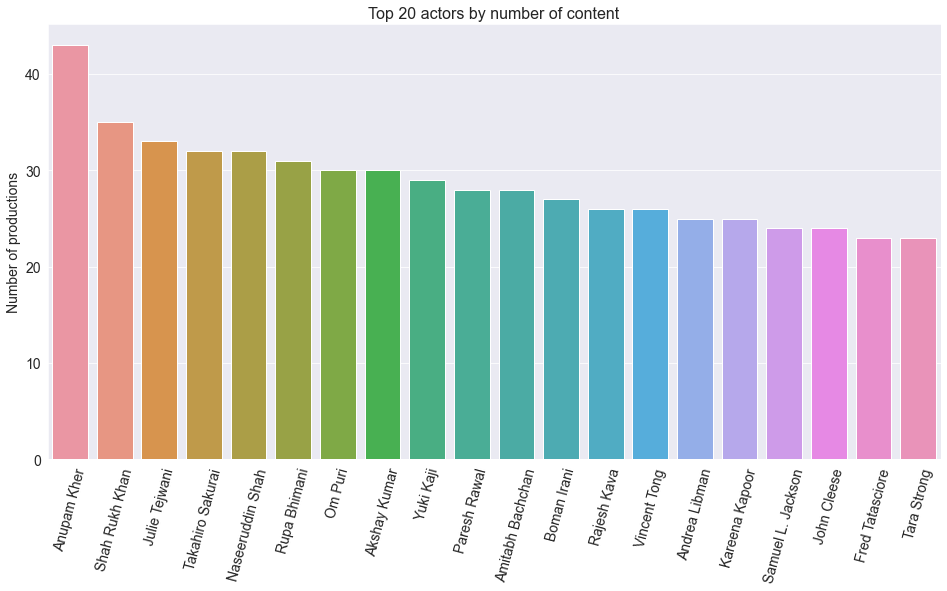

In [79]:
plt.figure(figsize=(16,8))
plt.title('Top 20 actors by number of content', fontsize=16)
plt.ylabel('Number of productions')
plt.xticks(rotation = 75)
sns.barplot(x = top_cast.index, y = top_cast.values)
plt.show()

Most of the top actors are from India.

In [80]:
directors = netflix_df['director'].copy()

In [81]:
directors.isna().sum()

2627

In [82]:
directors.dropna(inplace=True)

In [83]:
top_directors = directors.value_counts().head(20)
top_directors

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Ryan Polito                8
Hakan Algül                8
Quentin Tarantino          8
Kunle Afolayan             8
Johnnie To                 8
Lance Bangs                8
Yılmaz Erdoğan             8
Robert Rodriguez           8
Name: director, dtype: int64

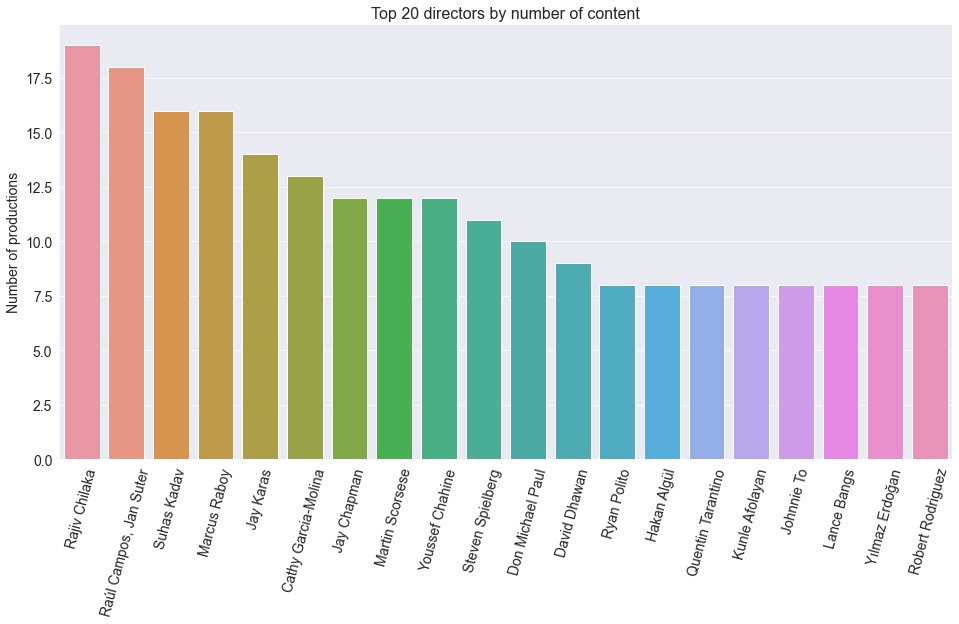

In [84]:
plt.figure(figsize=(16,8))
plt.title('Top 20 directors by number of content', fontsize=16)
plt.ylabel('Number of productions')
plt.xticks(rotation = 75)
sns.barplot(x = top_directors.index, y = top_directors.values)
plt.show()

In directors situation is similar - most are from India.

### Genres

In [85]:
genres = netflix_df.listed_in.copy()
genres

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8797, dtype: object

In [86]:
genres.dropna(inplace=True)

In [87]:
all_genres = []
for i in genres:
    ## if 'i' is a (string type) set of values it needs to be splited and then added to list
    ## otherwise it is a single value and can be added to list directly
    if isinstance(i, str):
        i = i.split(",")
        for z in i:
            z.replace(' ', '')
            all_genres.append(z.strip())
    else:
        all_genres.append(i.strip())

In [88]:
all_genres

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'British TV Shows',
 'Crime TV Shows',
 'Docuseries',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'International Movies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'Thrillers',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'In

In [89]:
all_genres_df = pd.DataFrame(all_genres, columns=['genre'])

In [90]:
top_genres = all_genres_df.genre.value_counts().head(20)
top_genres

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
TV Comedies                  574
Crime TV Shows               469
Kids' TV                     449
Docuseries                   394
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: genre, dtype: int64

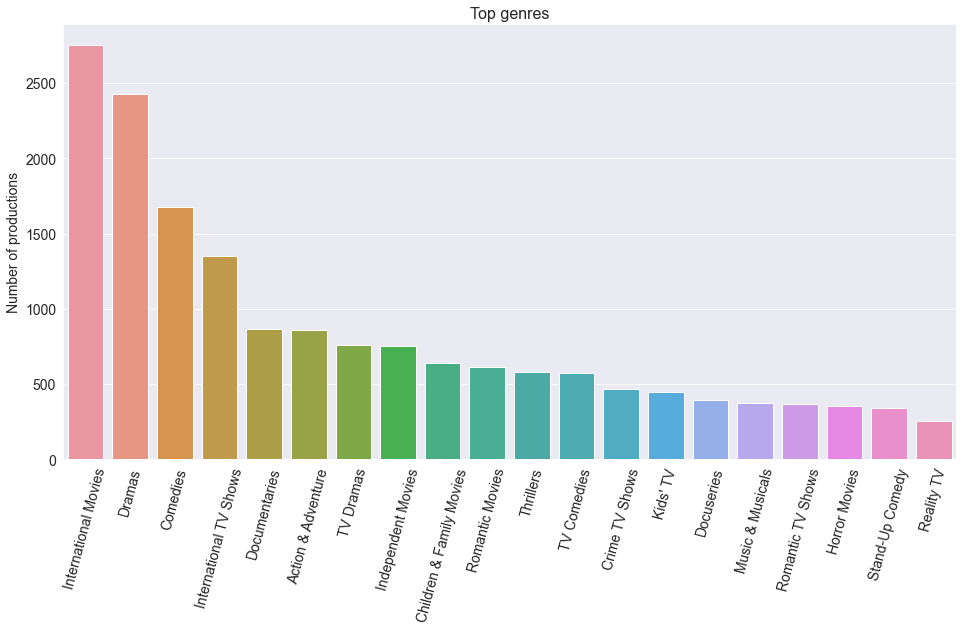

In [91]:
plt.figure(figsize=(16,8))
plt.title('Top genres', fontsize=16)
plt.ylabel('Number of productions')
plt.xticks(rotation = 75)
sns.barplot(x = top_genres.index, y = top_genres.values)
plt.show()

In [92]:
listed_in = netflix_df.listed_in.value_counts().head(15)
listed_in

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Comedies, International Movies, Romantic Movies     152
Dramas                                              138
Dramas, International Movies, Thrillers             134
Action & Adventure, Dramas, International Movies    132
Name: listed_in, dtype: int64

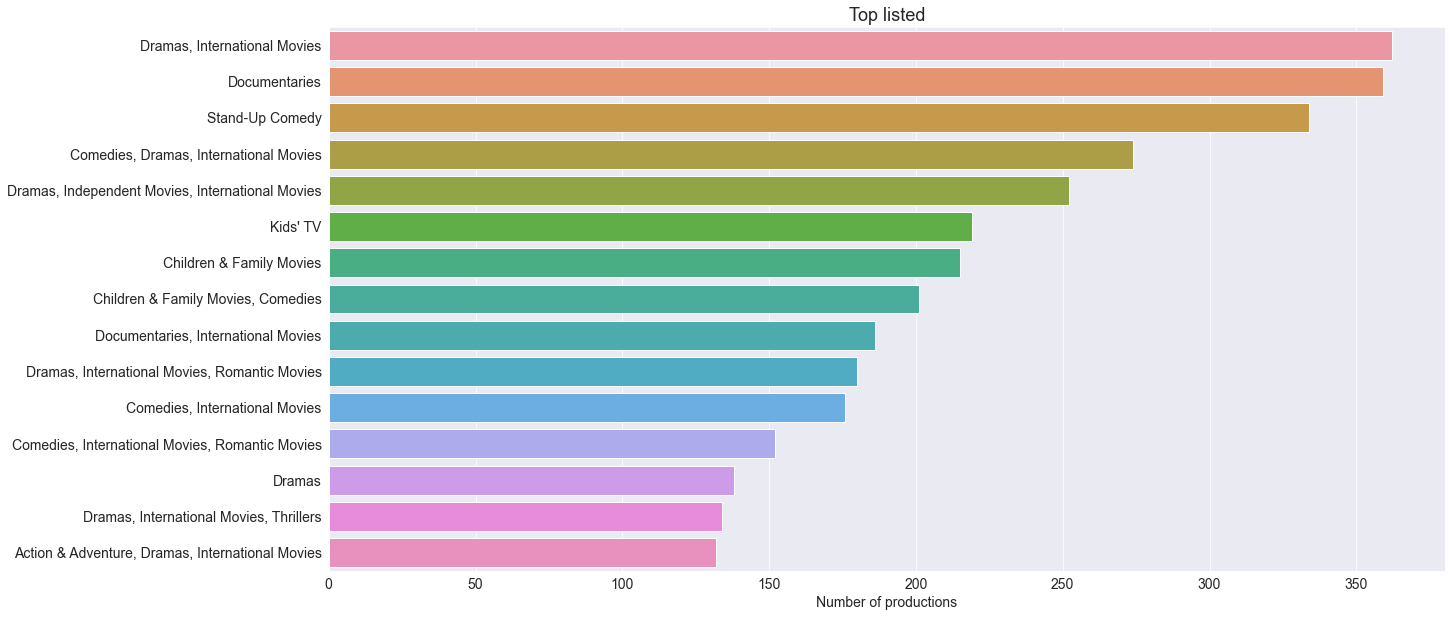

In [93]:
plt.figure(figsize=(20,10))
plt.title('Top listed', fontsize=18)
plt.xlabel('Number of productions')
sns.barplot(y = listed_in.index, x= listed_in.values)
plt.show()

In Netflix we can mostly find dramas, comedies and documentaries.

### Seasons

In [94]:
season_counts = series_df['seasons_num'].value_counts()
season_counts

1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: seasons_num, dtype: int64

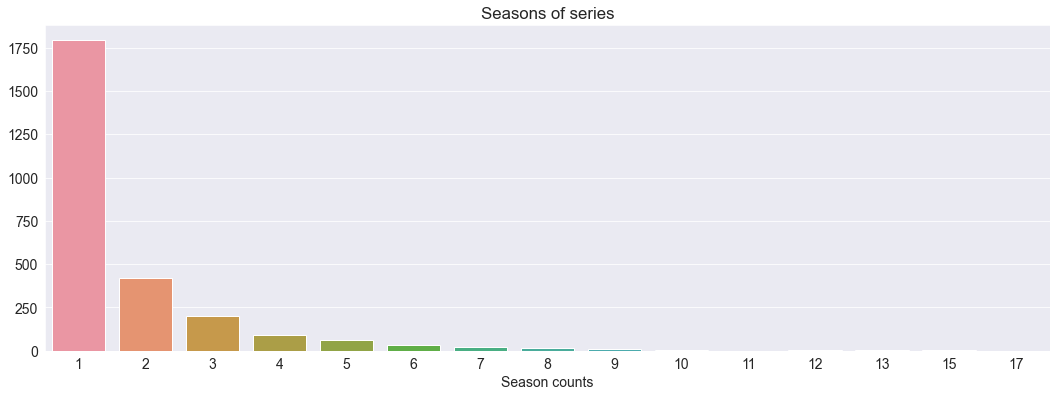

In [95]:
plt.figure(figsize=(18,6))
plt.title('Seasons of series')
plt.xlabel('Season counts')
sns.barplot(x = season_counts.index, y = season_counts.values)
plt.show()

In [96]:
avg_seasons_num = round(series_df.seasons_num.mean(), 2)
print('Average seasons number in series is ' + str(avg_seasons_num))

Average seasons number in series is 1.75


### Duration time

In [97]:
avg_duration = round(movies_df['duration (min)'].mean(), 2)
print('Average duration time of movies is ' + str(avg_duration) + ' minutes')

Average duration time of movies is 99.58 minutes


In [98]:
max_duration = movies_df['duration (min)'].max()
min_duration = movies_df['duration (min)'].min()
print('The longest movie last ' + str(max_duration) + ' minutes and the shortest ' + str(min_duration) + ' minutes.')

The longest movie last 312 minutes and the shortest 3 minutes.


In [99]:
#### find an average of duration movie time of countries which have more than 50 productions
avg_time_by_country = round(movies_df.groupby('country').filter(lambda x: len(x) > 50).groupby('country')['duration (min)'].mean(), 2)
avg_time_by_country.sort_values(ascending = False)

country
India                            126.92
Philippines                      111.95
United Kingdom, United States    111.21
Indonesia                        108.83
Egypt                            108.14
Turkey                           107.42
Nigeria                          107.03
Spain                            100.05
Japan                             98.46
France                            93.47
United States, Canada             90.73
United States                     90.63
Mexico                            87.53
United Kingdom                    84.87
Canada                            82.73
Name: duration (min), dtype: float64

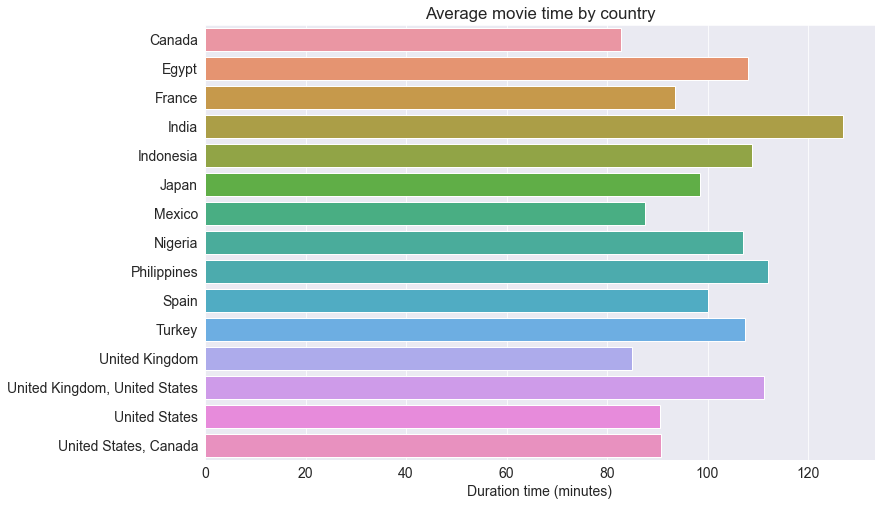

In [100]:
plt.figure(figsize=(12,8))
plt.title('Average movie time by country')
plt.xlabel('Duration time (minutes)')
ax = sns.barplot(y = avg_time_by_country.index, x = avg_time_by_country.values)
ax.set_ylabel(None)
plt.show()

Clearly the longest movies are produced in India. The shortest are made in Canada and UK.

### Release year

In [101]:
# take only those years where there were more than 20 movies 
mv_release_year = movies_df.groupby('release_year').filter(lambda x: len(x) > 20).groupby('release_year')['title'].count()
mv_release_year.head()

release_year
1993    24
1995    23
1996    21
1997    34
1998    32
Name: title, dtype: int64

In [102]:
# take only those years where there were more than 3 series
series_release_year = series_df.groupby('release_year').filter(lambda x: len(x) > 3).groupby('release_year')['title'].count()
series_release_year.head()

release_year
1993    4
1997    4
1998    4
1999    7
2000    4
Name: title, dtype: int64

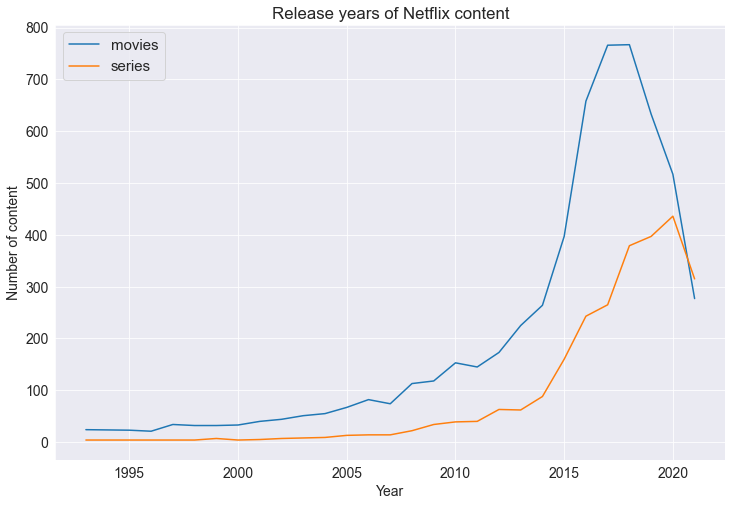

In [103]:
plt.figure(figsize=(12,8))
plt.title('Release years of Netflix content')
plt.xlabel('Year')
plt.ylabel('Number of content')
plt.plot(mv_release_year.index, mv_release_year.values)
plt.plot(series_release_year.index, series_release_year.values)
plt.legend(['movies', 'series'], prop={'size': 15})
plt.show()

It looks like on Netflix we can find mostly new productions, especially newer than 2015.
Let's find out the top 10 years by number of content released.

In [104]:
release_year = netflix_df['release_year'].value_counts().head(10)
release_year

2018.0    1146
2017.0    1031
2019.0    1030
2020.0     953
2016.0     901
2021.0     592
2015.0     557
2014.0     352
2013.0     287
2012.0     236
Name: release_year, dtype: int64

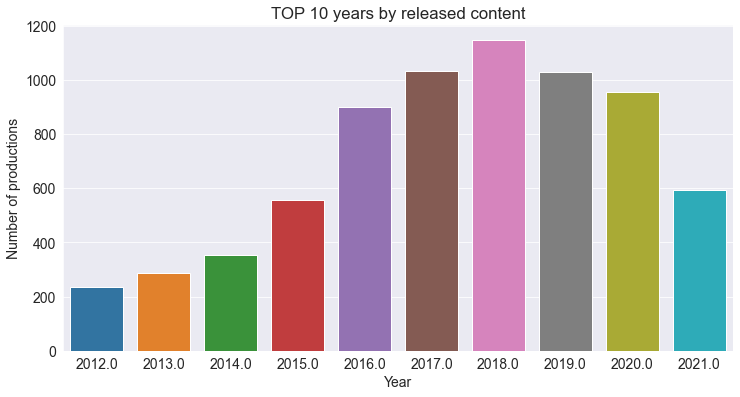

In [105]:
plt.figure(figsize=(12,6))
plt.title('TOP 10 years by released content')
plt.ylabel('Number of productions')
plt.xlabel('Year')
sns.barplot(x = release_year.index, y = release_year.values)
plt.show()

TOP 10 years are the last 10 years. Netflix is adding new productions to attract younger audience and give actual content.
Old classics are often not so interesting to the young, so we can barely found them on the platform.

### New content by year

In [106]:
year_added = netflix_df.year.value_counts().head(10)
year_added.index = year_added.index.astype(int)
year_added

2019    2016
2020    1879
2018    1649
2021    1498
2017    1187
2016     427
2015      82
2014      24
2011      13
2013      11
Name: year, dtype: int64

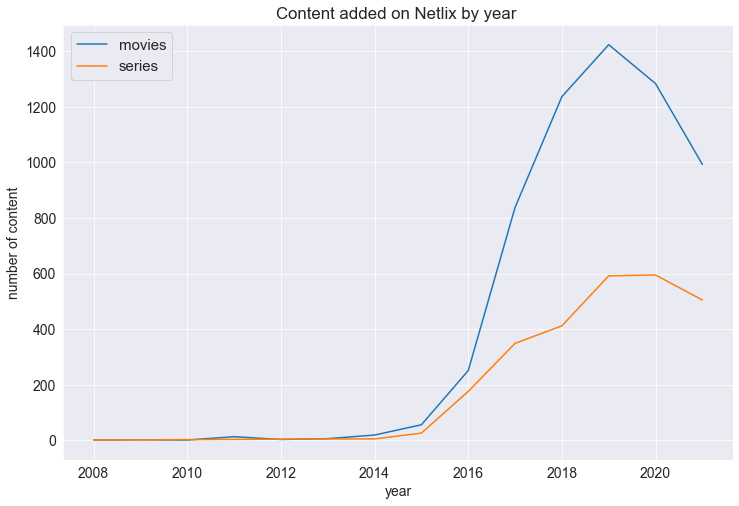

In [107]:
plt.figure(figsize=(12,8))
plt.title('Content added on Netlix by year ')
plt.xlabel('year')
plt.ylabel('number of content')
plt.plot(movies_df.groupby('year')['title'].count())
plt.plot(series_df.groupby('year')['title'].count())
plt.legend(['movies', 'series'], prop={'size': 15})

In [108]:
year_add_per_day = round(netflix_df.year.value_counts() /365, 2)
year_add_per_day.index = year_add_per_day.index.astype(int)
year_add_per_day

2019    5.52
2020    5.15
2018    4.52
2021    4.10
2017    3.25
2016    1.17
2015    0.22
2014    0.07
2011    0.04
2013    0.03
2012    0.01
2009    0.01
2008    0.01
2010    0.00
Name: year, dtype: float64

In 2016 Netflix became more popular, so it were added much more productions. In 2020 and 2021 we can notice small decrease in number of added productions. It may be caused by few reasons. One of them is covid pandemic that started at the very end of the 2019 and made impossible to produce movies. Other reason that comes to my mind could be a surge in new users (which is mostly caused by covid). Netflix may see that they don't need to spend so much money on new productions, because the number of new subscribers will be growing anyway. So they can be more economic, thus having the same profit.

### Is there any correlation between realease year and duration time of Netflix movies?

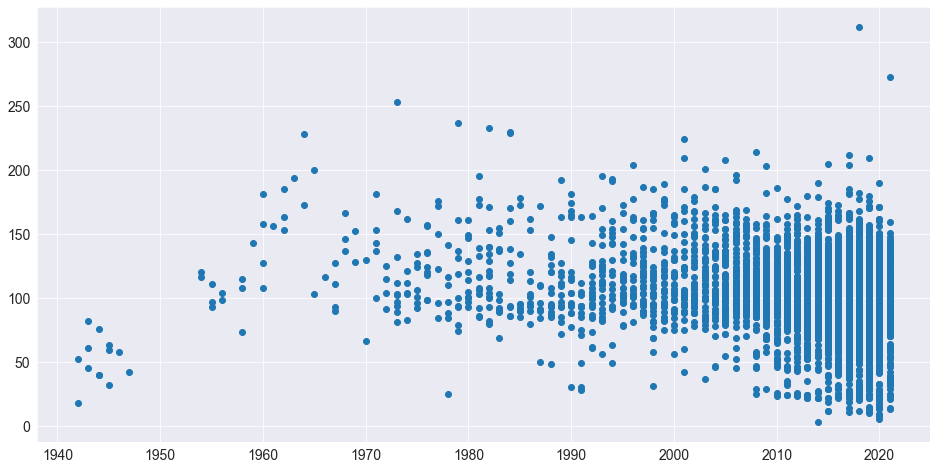

In [110]:
plt.figure(figsize=(16,8))
plt.scatter(movies_df.release_year, movies_df['duration (min)'])
plt.show()

- most movies last 90 - 110 minutes
- last years there were produced short movies (e.g. animations)
- there are just single movies that are longer than 180 minutes (3 hours)

### Does Netflix more focus on movies or series?

In [160]:
## I'm calculating the ratio of added movies to series each year
x = movies_df.groupby('year')['title'].count() / series_df.groupby('year')['title'].count()
x.fillna(0)

year
2008    1.000000
2009    0.000000
2010    0.000000
2011    0.000000
2012    0.000000
2013    1.200000
2014    3.800000
2015    2.153846
2016    1.426136
2017    2.401146
2018    3.002427
2019    2.405405
2020    2.157983
2021    1.966337
Name: title, dtype: float64

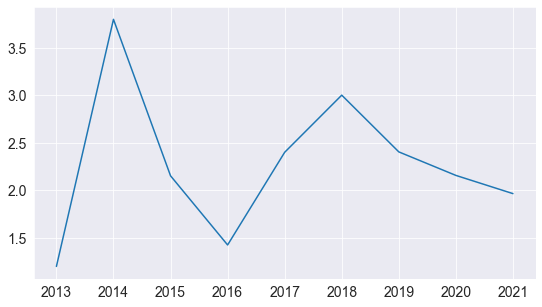

In [161]:
plt.plot(x.tail(10))
plt.show()

In 2014 when Netflix wasn't so popular there were almost 4 movies added per 1 series. When the popularity of rapidly grown in 2016, number of added series was the highest and slightly less than number of added movies. In last years, ratio of added movies to series has been around 2 and is slowly decreasing.

## Final conclusions

In my analysis I found many insights and conclusions. Most important ones are:
- in Netflix offer, 70% are movies and 30% are series
- recently there are added about 2 movies per 1 series; this number is slowly decreasing
- the biggest part of Netflix offer was produced in US, but there are also many content from India
- almost all of top actors and directors by number of content are from India
- top genres are: dramas, comedies, documentaries
- we can find new content (mostly newer than 2015)
- Netflix gained popularity in 2016 and quickly started to add new content
- there are productions for everyone, from little kids to the mature; the older the audience, the more movies for them